In [25]:
import pandas as pd
import numpy as np

print("--- Proje 7: 2 Aşamalı Hibrit (METABRIC + TCGA) ---")
print("Adım 1: Gerekli Tüm 11 Veri Kaynağını Yükleme")
print("==================================================")

# METABRIC (Proje 6) dosya adları
mutations_file_metabric = 'data_mutations-metabric.txt'
clinical_file_metabric = 'data_clinical_patient-metabric.txt'
cna_file_metabric = 'data_cna-metabric.txt'
mrna_file_metabric = 'data_mrna-metabric.txt'

# TCGA (Proje 4) dosya adları
mutations_file_tcga = 'data_mutations-breast.txt'
clinical_file_tcga = 'data_clinical_patient-breast.txt'
treatment_file_tcga = 'data_timeline_treatment-breast.txt'
cna_file_tcga = 'data_cna.txt'
mrna_file_tcga = 'data_mrna_seq_v2_rsem.txt'

# STRING (Evrensel) dosya adları
protein_info_file = '9606.protein.info.v12.0.txt'
protein_links_file = '9606.protein.links.v12.0.txt'

try:
    # --- 1. METABRIC Verilerini (Strateji Modeli için) Yükle ---
    print("\n--- METABRIC (Strateji) Verisi Yükleniyor ---")
    maf_metabric = pd.read_csv(mutations_file_metabric, sep='\t', comment='#')
    print("✅ 1/11: METABRIC Mutasyon (maf_metabric) yüklendi.")
    df_clinical_metabric = pd.read_csv(clinical_file_metabric, sep='\t', comment='#')
    print("✅ 2/11: METABRIC Klinik (df_clinical_metabric) yüklendi.")
    df_cna_metabric = pd.read_csv(cna_file_metabric, sep='\t', index_col='Hugo_Symbol')
    print("✅ 3/11: METABRIC CNA (df_cna_metabric) yüklendi.")
    df_mrna_metabric = pd.read_csv(mrna_file_metabric, sep='\t', index_col='Hugo_Symbol')
    if 'Entrez_Gene_Id' in df_mrna_metabric.columns:
        df_mrna_metabric = df_mrna_metabric.drop(columns=['Entrez_Gene_Id'])
    print("✅ 4/11: METABRIC RNA (df_mrna_metabric) yüklendi.")

    # --- 2. TCGA Verilerini (Taktik/İlaç Modeli için) Yükle ---
    print("\n--- TCGA (Taktik/İlaç) Verisi Yükleniyor ---")
    maf_tcga = pd.read_csv(mutations_file_tcga, sep='\t', comment='#')
    print("✅ 5/11: TCGA Mutasyon (maf_tcga) yüklendi.")
    df_clinical_tcga = pd.read_csv(clinical_file_tcga, sep='\t', comment='#')
    print("✅ 6/11: TCGA Klinik (df_clinical_tcga) yüklendi.")
    df_treatment_tcga = pd.read_csv(treatment_file_tcga, sep='\t', comment='#')
    print("✅ 7/11: TCGA Tedavi (df_treatment_tcga) yüklendi.")
    df_cna_tcga = pd.read_csv(cna_file_tcga, sep='\t', index_col='Hugo_Symbol')
    print("✅ 8/11: TCGA CNA (df_cna_tcga) yüklendi.")
    df_mrna_tcga = pd.read_csv(mrna_file_tcga, sep='\t', index_col='Hugo_Symbol')
    print("✅ 9/11: TCGA RNA (df_mrna_tcga) yüklendi.")
    
    # --- 3. STRING Verilerini (Sinyal Tespiti için) Yükle ---
    print("\n--- STRING (Sinyal) Verisi Yükleniyor ---")
    df_info = pd.read_csv(
        protein_info_file, sep='\t', 
        usecols=['#string_protein_id', 'preferred_name'],
        comment=None 
    )
    df_info.rename(columns={'#string_protein_id': 'string_protein_id'}, inplace=True)
    df_info_indexed = df_info.set_index('preferred_name')
    df_info_reset = df_info.copy()
    print("✅ 10/11: STRING Sözlük (df_info) yüklendi.")

    df_links = pd.read_csv(
        protein_links_file, sep=' ', 
        usecols=['protein1', 'protein2', 'combined_score']
    )
    print("✅ 11/11: STRING İlişkiler (df_links) yüklendi.")
    
    print("\n--- Tüm 11 'Proje 7' Veri Kaynağı Başarıyla Yüklendi ---")
    print("Hücre 2'ye (Konsensüs Sinyal Tespiti) geçebilirsiniz.")

except FileNotFoundError as e:
    print(f"HATA: {e}")
    print("Lütfen METABRIC (4 adet), TCGA (5 adet) ve STRING (2 adet) dosyalarının tamamının mevcut olduğundan emin olun.")
except Exception as e:
    print(f"Bir hata oluştu: {e}")

--- Proje 7: 2 Aşamalı Hibrit (METABRIC + TCGA ) ---
Adım 1: Gerekli Tüm 11 Veri Kaynağını Yükleme

--- METABRIC (Strateji) Verisi Yükleniyor ---
✅ 1/11: METABRIC Mutasyon (maf_metabric) yüklendi.
✅ 2/11: METABRIC Klinik (df_clinical_metabric) yüklendi.
✅ 3/11: METABRIC CNA (df_cna_metabric) yüklendi.
✅ 4/11: METABRIC RNA (df_mrna_metabric) yüklendi.

--- TCGA (Taktik/İlaç) Verisi Yükleniyor ---


C:\Users\yunus\AppData\Local\Temp\ipykernel_35336\2424694776.py:41: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  maf_tcga = pd.read_csv(mutations_file_tcga, sep='\t', comment='#')


✅ 5/11: TCGA Mutasyon (maf_tcga) yüklendi.
✅ 6/11: TCGA Klinik (df_clinical_tcga) yüklendi.
✅ 7/11: TCGA Tedavi (df_treatment_tcga) yüklendi.
✅ 8/11: TCGA CNA (df_cna_tcga) yüklendi.
✅ 9/11: TCGA RNA (df_mrna_tcga) yüklendi.

--- STRING (Sinyal) Verisi Yükleniyor ---
✅ 10/11: STRING Sözlük (df_info) yüklendi.
✅ 11/11: STRING İlişkiler (df_links) yüklendi.

--- Tüm 11 'Proje 7' Veri Kaynağı Başarıyla Yüklendi ---
Hücre 2'ye (Konsensüs Sinyal Tespiti) geçebilirsiniz.


In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from collections import Counter # Listelerdeki genleri saymak için

print("--- Proje 7: 2 Aşamalı Hibrit ---")
print("Adım 2: 'Konsensüs Sinyal' Tespiti (ML + STRING)")
print("==================================================")

# (Hücre 1'de yüklenen 'maf_metabric', 'df_info_indexed', 'df_links' vb.
#  değişkenleri kullandığını varsayar)

try:
    # --- 0. HAZIRLIK ---
    
    # 6 'Ünlü' (Ana Hedef) genimiz
    manual_target_genes = ['PIK3CA', 'TP53', 'ERBB2', 'GATA3', 'CDH1', 'MAP3K1']
    
    # ML Matrisini (METABRIC verisi ile) hazırla
    ml_data = maf_metabric[['Tumor_Sample_Barcode', 'Hugo_Symbol']].drop_duplicates()
    ml_matrix_brca = pd.crosstab(ml_data['Tumor_Sample_Barcode'], ml_data['Hugo_Symbol'])
    ml_matrix_brca = ml_matrix_brca.applymap(lambda x: 1 if x > 0 else 0)
    print(f"ML Matrisi (METABRIC) hazırlandı: {ml_matrix_brca.shape} (Hasta x Gen)")

    # Tüm 'Top 20' listelerini saklayacağımız ana liste
    all_signal_genes_list = []

    # --- 1. ML Taraması (6 Model Eğitimi) ---
    print("\n--- ML Taraması (6 model) Başlatılıyor... ---")
    
    for target_gene_ml in manual_target_genes:
        if target_gene_ml not in ml_matrix_brca.columns:
            print(f"UYARI: ML Taraması için '{target_gene_ml}' matriste bulunamadı, atlanıyor.")
            continue
            
        print(f"Model {manual_target_genes.index(target_gene_ml)+1}/6: '{target_gene_ml}' tahmini için eğitiliyor...")
        
        y = ml_matrix_brca[target_gene_ml]
        # 'Hile'yi engelle: Diğer 'ünlü' genleri X'ten çıkar
        cols_to_drop = [gen for gen in manual_target_genes if gen in ml_matrix_brca.columns]
        X = ml_matrix_brca.drop(columns=cols_to_drop)
        
        model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
        model_rf.fit(X, y)
        
        importances = model_rf.feature_importances_
        feature_importance_df = pd.DataFrame({
            'Gene': X.columns,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        
        ml_top_20 = feature_importance_df.head(20)['Gene'].tolist()
        
        # 'Top 20' listesini ana listeye ekle
        all_signal_genes_list.extend(ml_top_20)
        
    print("✅ ML Taraması tamamlandı (6 'Top 20' liste bulundu).")

    # --- 2. STRING Taraması (6 Gen Sorgusu) ---
    print("\n--- STRING Taraması (6 gen) Başlatılıyor... ---")
    
    for string_target_gene in manual_target_genes:
        if string_target_gene not in df_info_indexed.index:
            print(f"UYARI: STRING Taraması için '{string_target_gene}' 'Sözlük'te bulunamadı, atlanıyor.")
            continue
            
        print(f"Sorgu {manual_target_genes.index(string_target_gene)+1}/6: '{string_target_gene}' biyolojik arkadaşları aranıyor...")
        
        # (Proje 5, Hücre 2'deki Adım 3a, 3b, 3c)
        target_string_id = df_info_indexed.loc[string_target_gene, 'string_protein_id']
        if isinstance(target_string_id, pd.Series): target_string_id = target_string_id.iloc[0]
            
        links_part1 = df_links[df_links['protein1'] == target_string_id][['protein2', 'combined_score']]
        links_part2 = df_links[df_links['protein2'] == target_string_id][['protein1', 'combined_score']]
        links_part2.columns = ['protein2', 'combined_score']
        all_partners = pd.concat([links_part1, links_part2], ignore_index=True)
        top_20_partners_df = all_partners.sort_values(by='combined_score', ascending=False).head(20)
        
        top_20_genes_df = pd.merge(
            top_20_partners_df, df_info_reset,
            left_on='protein2', right_on='string_protein_id', how='left'
        )
        string_top_20 = top_20_genes_df['preferred_name'].tolist()
        
        # 'Top 20' listesini ana listeye ekle
        all_signal_genes_list.extend(string_top_20)
        
    print("✅ STRING Taraması tamamlandı (6 'Top 20' liste bulundu).")

    # --- 3. KONSENSÜS FİLTRESİ (n >= 2) ---
    print("\n--- Konsensüs Filtresi Uygulanıyor (n >= 2) ---")
    
    gene_counts = Counter(all_signal_genes_list)
    consensus_genes = [gene for gene, count in gene_counts.items() if count >= 2]
    
    print(f"Toplam {len(gene_counts)} 'potansiyel sinyal' geni bulundu (12 listede en az 1 kez görünen).")
    print(f"Bunlardan {len(consensus_genes)} tanesi 2 VEYA DAHA FAZLA LİSTEDE ('Konsensüs') yer alıyor.")

    # --- 4. NİHAİ ADIM: 'PARMAK İZİ' OLUŞTURMA ---
    
    # Bu 'Konsensüs' genlerini VE orijinal 'Ünlü' genlerimizi birleştir
    genes_to_use_consensus = manual_target_genes + consensus_genes
    
    # Tekrarlananları (duplicate) kaldır
    genes_to_use_consensus = list(dict.fromkeys(genes_to_use_consensus))
    
    print("\n--- 'PROJE 7 KONSENSÜS PARMAK İZİ' OLUŞTURULDU ---")
    print(f"Toplam {len(genes_to_use_consensus)} adet benzersiz 'sinyal' geni bulundu.")
    print("Bu liste, Hücre 3 (Strateji DB) ve Hücre 4'e (Taktik DB) geçmek için hazır.")

except NameError as e:
    print(f"HATA: {e}")
    print("Lütfen Hücre 1'i (Tüm Verileri Yükleme) başarıyla çalıştırdığınızdan emin olun.")
except KeyError as e:
    print(f"HATA: {e} geni 'Sözlük'te veya 'ML Matrisi'nde bulunamadı.")
except Exception as e:
    print(f"Beklenmedik bir hata oluştu: {e}")

--- Proje 7: 2 Aşamalı Hibrit ---
Adım 2: 'Konsensüs Sinyal' Tespiti (ML + STRING)


C:\Users\yunus\AppData\Local\Temp\ipykernel_35336\687130335.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ml_matrix_brca = ml_matrix_brca.applymap(lambda x: 1 if x > 0 else 0)


ML Matrisi (METABRIC) hazırlandı: (2369, 173) (Hasta x Gen)

--- ML Taraması (6 model) Başlatılıyor... ---
Model 1/6: 'PIK3CA' tahmini için eğitiliyor...
Model 2/6: 'TP53' tahmini için eğitiliyor...
Model 3/6: 'ERBB2' tahmini için eğitiliyor...
Model 4/6: 'GATA3' tahmini için eğitiliyor...
Model 5/6: 'CDH1' tahmini için eğitiliyor...
Model 6/6: 'MAP3K1' tahmini için eğitiliyor...
✅ ML Taraması tamamlandı (6 'Top 20' liste bulundu).

--- STRING Taraması (6 gen) Başlatılıyor... ---
Sorgu 1/6: 'PIK3CA' biyolojik arkadaşları aranıyor...
Sorgu 2/6: 'TP53' biyolojik arkadaşları aranıyor...
Sorgu 3/6: 'ERBB2' biyolojik arkadaşları aranıyor...
Sorgu 4/6: 'GATA3' biyolojik arkadaşları aranıyor...
Sorgu 5/6: 'CDH1' biyolojik arkadaşları aranıyor...
Sorgu 6/6: 'MAP3K1' biyolojik arkadaşları aranıyor...
✅ STRING Taraması tamamlandı (6 'Top 20' liste bulundu).

--- Konsensüs Filtresi Uygulanıyor (n >= 2) ---
Toplam 92 'potansiyel sinyal' geni bulundu (12 listede en az 1 kez görünen).
Bunlardan 72 t

In [27]:
import pandas as pd
import numpy as np

print("--- Proje 7: 2 Aşamalı Hibrit ---")
print("Adım 3: Aşama 1 (Strateji) Veritabanı Oluşturma (METABRIC ile)")
print("======================================================")

# (Hücre 1'den 'df_clinical_metabric', 'df_cna_metabric', 'df_mrna_metabric')
# (Hücre 2'den 'ml_matrix_brca', 'genes_to_use_consensus')
# değişkenlerinin hafızada olduğunu varsayar)

try:
    # --- 1. GENETİK PARMAK İZİ (MUTASYON) ---
    # 'ml_matrix_brca' (Hücre 2'de METABRIC verisinden oluşturulmuştu)
    
    # Sadece 'genes_to_use_consensus' (78 gen) listemizdeki genleri seç
    valid_genes_in_matrix_metabric = [
        gen for gen in genes_to_use_consensus 
        if gen in ml_matrix_brca.columns
    ]
    df_mutations = ml_matrix_brca[valid_genes_in_matrix_metabric].copy()
    
    df_mutations['PATIENT_ID'] = df_mutations.index
    df_mutations_grouped = df_mutations.groupby('PATIENT_ID').max() # 1 veya 0
    print(f"✅ 1/5: Mutasyon Katmanı (Konsensüs) {len(valid_genes_in_matrix_metabric)} 'sinyal' geni için hazırlandı.")
    df_mutations_grouped = df_mutations_grouped.add_prefix('MUT_')

    # --- 2. GENETİK PARMAK İZİ (KOPYA SAYISI - CNA) ---
    cna_genes_to_use = [gen for gen in valid_genes_in_matrix_metabric if gen in df_cna_metabric.index]
    df_cna_filtered = df_cna_metabric.loc[cna_genes_to_use].T 
    df_cna_filtered['PATIENT_ID'] = df_cna_filtered.index
    df_cna_grouped = df_cna_filtered.groupby('PATIENT_ID').mean(numeric_only=True) 
    print(f"✅ 2/5: CNA Katmanı {len(cna_genes_to_use)} gen için hazırlandı.")
    df_cna_grouped = df_cna_grouped.add_prefix('CNA_')

    # --- 3. GENETİK PARMAK İZİ (RNA İFADESİ) ---
    mrna_genes_to_use = [gen for gen in valid_genes_in_matrix_metabric if gen in df_mrna_metabric.index]
    df_mrna_filtered = df_mrna_metabric.loc[mrna_genes_to_use].T
    df_mrna_filtered['PATIENT_ID'] = df_mrna_filtered.index
    df_mrna_grouped = df_mrna_filtered.groupby('PATIENT_ID').mean(numeric_only=True) 
    print(f"✅ 3/5: RNA-Seq Katmanı {len(mrna_genes_to_use)} gen için hazırlandı.")
    df_mrna_grouped = df_mrna_grouped.add_prefix('RNA_')

    # --- 4. KLİNİK VE TEDAVİ VERİSİ (METABRIC SİSTEMİ) ---
    # 'df_clinical_metabric' (Hücre 1'den)
    
    # 4a. BAŞARI ÖLÇÜTÜ (Y) - (Yaşam Süresi)
    df_survival = df_clinical_metabric[['PATIENT_ID', 'OS_STATUS', 'OS_MONTHS']].copy()
    df_survival['event'] = df_survival['OS_STATUS'].apply(lambda x: int(str(x).split(':')[0]) if pd.notna(x) else np.nan)
    df_survival['duration'] = df_survival['OS_MONTHS']
    
    # 4b. KLİNİK ÖZELLİKLER (X) - (Yaş ve NPI)
    df_clinical_features = df_clinical_metabric[['PATIENT_ID', 'AGE_AT_DIAGNOSIS', 'NPI']].copy()
    df_clinical_features.rename(columns={
        'AGE_AT_DIAGNOSIS': 'AGE',
        'NPI': 'NPI_SCORE'
    }, inplace=True)
    print("✅ 4/5: Klinik (Yaş, NPI Skoru) ve Yaşam Süresi verisi hazırlandı.")
    
    # 4c. TEDAVİ (REGIMEN - Kategori)
    df_treatment = df_clinical_metabric[['PATIENT_ID', 'CHEMOTHERAPY', 'HORMONE_THERAPY']].copy()
    
    def define_regimen(row):
        chemo = str(row['CHEMOTHERAPY']).upper() == 'YES' or row['CHEMOTHERAPY'] == 1
        hormone = str(row['HORMONE_THERAPY']).upper() == 'YES' or row['HORMONE_THERAPY'] == 1
        
        if chemo and hormone: return 'Chemo + Hormone'
        if chemo and not hormone: return 'Chemotherapy Only'
        if not chemo and hormone: return 'Hormone Therapy Only'
        if not chemo and not hormone: return 'No Chemo/Hormone'
        return 'Unknown'

    df_treatment['REGIMEN_STRATEGY'] = df_treatment.apply(define_regimen, axis=1) # Sütun adını değiştirdik
    print("✅ 5/5: Tedavi Stratejileri (METABRIC) verisi hazırlandı.")

    # --- 5. NİHAİ ÇOK-OMİK BİRLEŞTİRME (METABRIC) ---
    print("\nTüm 5 METABRIC veri katmanı birleştiriliyor...")
    
    final_features_db = df_mutations_grouped.join(df_cna_grouped, how='outer')
    final_features_db = final_features_db.join(df_mrna_grouped, how='outer')
    
    final_features_db = pd.merge(final_features_db, df_clinical_features[['PATIENT_ID', 'AGE', 'NPI_SCORE']], left_index=True, right_on='PATIENT_ID', how='inner')
    final_db = pd.merge(final_features_db, df_treatment[['PATIENT_ID', 'REGIMEN_STRATEGY']], on='PATIENT_ID', how='inner')
    final_db = pd.merge(final_db, df_survival[['PATIENT_ID', 'duration', 'event']], on='PATIENT_ID', how='inner')
    
    # --- 6. TEMİZLİK ---
    feature_cols_strategy = [col for col in final_db.columns if col.startswith(('MUT_', 'CNA_', 'RNA_', 'AGE', 'NPI_SCORE'))]
    
    # EKSİK VERİSİ olanları AT
    df_recommender_db_STRATEGY = final_db.dropna(subset=['duration', 'event', 'REGIMEN_STRATEGY'] + feature_cols_strategy).copy()
    
    # Hücre 5'te (Final) kullanılmak üzere kaydet
    final_features_to_use_STRATEGY = feature_cols_strategy
    
    print(f"\n✅ NİHAİ 'STRATEJİ' (METABRIC) BİRLEŞTİRMESİ TAMAMLANDI.")
    print(f"Aşama 1 Modeli (Strateji) için {len(df_recommender_db_STRATEGY)} adet 'tam' METABRIC hastası bulundu.")
    print(f"(Bu hastalar, {len(final_features_to_use_STRATEGY)} 'Konsensüs' özelliğine sahip)")
    
    print("\n--- Strateji Veritabanındaki Tedavi Rejimleri Dağılımı ---")
    print(df_recommender_db_STRATEGY['REGIMEN_STRATEGY'].value_counts())

except NameError as e:
    print(f"HATA: {e}")
    print("Lütfen Hücre 1 ve Hücre 2'nin başarıyla çalıştığından emin olun.")
except KeyError as e:
    print(f"HATA: {e} sütunu veride bulunamadı.")
except Exception as e:
    print(f"Beklenmedik bir hata oluştu: {e}")

--- Proje 7: 2 Aşamalı Hibrit ---
Adım 3: Aşama 1 (Strateji) Veritabanı Oluşturma (METABRIC ile)
✅ 1/5: Mutasyon Katmanı (Konsensüs) 39 'sinyal' geni için hazırlandı.
✅ 2/5: CNA Katmanı 38 gen için hazırlandı.
✅ 3/5: RNA-Seq Katmanı 38 gen için hazırlandı.
✅ 4/5: Klinik (Yaş, NPI Skoru) ve Yaşam Süresi verisi hazırlandı.
✅ 5/5: Tedavi Stratejileri (METABRIC) verisi hazırlandı.

Tüm 5 METABRIC veri katmanı birleştiriliyor...

✅ NİHAİ 'STRATEJİ' (METABRIC) BİRLEŞTİRMESİ TAMAMLANDI.
Aşama 1 Modeli (Strateji) için 1866 adet 'tam' METABRIC hastası bulundu.
(Bu hastalar, 117 'Konsensüs' özelliğine sahip)

--- Strateji Veritabanındaki Tedavi Rejimleri Dağılımı ---
REGIMEN_STRATEGY
Hormone Therapy Only    966
No Chemo/Hormone        516
Chemotherapy Only       210
Chemo + Hormone         174
Name: count, dtype: int64


In [28]:
import pandas as pd
import numpy as np

print("--- Proje 7: 2 Aşamalı Hibrit ---")
print("Adım 4: Aşama 2 (Taktik/İlaç) Veritabanı Oluşturma (TCGA ile)")
print("======================================================")

# (Hücre 1'den 'maf_tcga', 'df_clinical_tcga', 'df_treatment_tcga', 
#  'df_cna_tcga', 'df_mrna_tcga')
# (Hücre 2'den 'genes_to_use_consensus' - 78 genlik 'parmak izi')
# değişkenlerinin hafızada olduğunu varsayar)

try:
    # --- 1. GENETİK PARMAK İZİ (MUTASYON) - TCGA ---
    
    # TCGA verisi için ML Matrisini oluştur
    ml_data_tcga = maf_tcga[['Tumor_Sample_Barcode', 'Hugo_Symbol']].drop_duplicates()
    ml_matrix_brca_tcga = pd.crosstab(ml_data_tcga['Tumor_Sample_Barcode'], ml_data_tcga['Hugo_Symbol'])
    ml_matrix_brca_tcga = ml_matrix_brca_tcga.applymap(lambda x: 1 if x > 0 else 0)
    print(f"ML Matrisi (TCGA) oluşturuldu: {ml_matrix_brca_tcga.shape} (Hasta x Gen)")
    
    # Sadece 'genes_to_use_consensus' (78 gen) listemizdeki genleri seç
    valid_genes_in_matrix_tcga = [
        gen for gen in genes_to_use_consensus 
        if gen in ml_matrix_brca_tcga.columns
    ]
    df_mutations_tcga = ml_matrix_brca_tcga[valid_genes_in_matrix_tcga].copy()
    
    df_mutations_tcga['PATIENT_ID'] = df_mutations_tcga.index.str[0:12]
    df_mutations_grouped_tcga = df_mutations_tcga.groupby('PATIENT_ID').max() # 1 veya 0
    print(f"✅ 1/5: Mutasyon Katmanı (Konsensüs) {len(valid_genes_in_matrix_tcga)} 'sinyal' geni için hazırlandı.")
    df_mutations_grouped_tcga = df_mutations_grouped_tcga.add_prefix('MUT_')

    # --- 2. GENETİK PARMAK İZİ (KOPYA SAYISI - CNA) - TCGA ---
    cna_genes_to_use_tcga = [gen for gen in valid_genes_in_matrix_tcga if gen in df_cna_tcga.index]
    df_cna_filtered_tcga = df_cna_tcga.loc[cna_genes_to_use_tcga].T 
    df_cna_filtered_tcga['PATIENT_ID'] = df_cna_filtered_tcga.index.str[0:12]
    df_cna_grouped_tcga = df_cna_filtered_tcga.groupby('PATIENT_ID').mean(numeric_only=True) 
    print(f"✅ 2/5: CNA Katmanı {len(cna_genes_to_use_tcga)} gen için hazırlandı.")
    df_cna_grouped_tcga = df_cna_grouped_tcga.add_prefix('CNA_')

    # --- 3. GENETİK PARMAK İZİ (RNA İFADESİ) - TCGA ---
    mrna_genes_to_use_tcga = [gen for gen in valid_genes_in_matrix_tcga if gen in df_mrna_tcga.index]
    df_mrna_filtered_tcga = df_mrna_tcga.loc[mrna_genes_to_use_tcga].T
    df_mrna_filtered_tcga['PATIENT_ID'] = df_mrna_filtered_tcga.index.str[0:12]
    df_mrna_grouped_tcga = df_mrna_filtered_tcga.groupby('PATIENT_ID').mean(numeric_only=True) 
    print(f"✅ 3/5: RNA-Seq Katmanı {len(mrna_genes_to_use_tcga)} gen için hazırlandı.")
    df_mrna_grouped_tcga = df_mrna_grouped_tcga.add_prefix('RNA_')

    # --- 4. KLİNİK VE TEDAVİ VERİSİ (TCGA SİSTEMİ) ---
    
    # 4a. BAŞARI ÖLÇÜTÜ (Y) - (Yaşam Süresi)
    df_survival_tcga = df_clinical_tcga[['PATIENT_ID', 'OS_STATUS', 'OS_MONTHS']].copy()
    df_survival_tcga['event'] = df_survival_tcga['OS_STATUS'].apply(lambda x: int(str(x).split(':')[0]) if pd.notna(x) else np.nan)
    df_survival_tcga['duration'] = df_survival_tcga['OS_MONTHS']
    
    # 4b. KLİNİK ÖZELLİKLER (X) - (Yaş ve Evre)
    # TCGA'da NPI olmadığı için 'Evre' (STAGE) kullanıyoruz
    df_clinical_features_tcga = df_clinical_tcga[['PATIENT_ID', 'AGE', 'AJCC_PATHOLOGIC_TUMOR_STAGE']].copy()
    
    def clean_stage(stage_str): # (Proje 4'teki fonksiyon)
        if pd.isna(stage_str): return np.nan
        stage_str = str(stage_str).upper()
        if 'IV' in stage_str: return 4
        if 'III' in stage_str: return 3
        if 'II' in stage_str: return 2
        if 'I' in stage_str: return 1
        return 0 
    
    df_clinical_features_tcga['STAGE'] = df_clinical_features_tcga['AJCC_PATHOLOGIC_TUMOR_STAGE'].apply(clean_stage)
    print("✅ 4/5: Klinik (Yaş, Evre) ve Yaşam Süresi verisi hazırlandı.")
    
    # 4c. TEDAVİ (REGIMEN - Spesifik İlaçlar)
    df_treatment_tcga['AGENT'].fillna('Unknown', inplace=True)
    df_agents_per_patient_tcga = df_treatment_tcga.groupby('PATIENT_ID')['AGENT'].apply(set)
    df_agents_list_tcga = df_agents_per_patient_tcga.apply(lambda s: [a for a in s if a not in ['Unknown', 'nan', ''] and pd.notna(a)])
    df_patient_regimens_tcga = df_agents_list_tcga.reset_index(name='TREATMENT_AGENTS')
    df_patient_regimens_tcga = df_patient_regimens_tcga[df_patient_regimens_tcga['TREATMENT_AGENTS'].map(len) > 0]
    df_patient_regimens_tcga['REGIMEN_TACTIC'] = df_patient_regimens_tcga['TREATMENT_AGENTS'].apply(lambda a: ' + '.join(sorted(a)))
    print("✅ 5/5: Tedavi Taktikleri (Spesifik İlaçlar) verisi hazırlandı.")

    # --- 5. NİHAİ ÇOK-OMİK BİRLEŞTİRME (TCGA) ---
    print("\nTüm 5 TCGA veri katmanı birleştiriliyor...")
    
    final_features_db_tcga = df_mutations_grouped_tcga.join(df_cna_grouped_tcga, how='outer')
    final_features_db_tcga = final_features_db_tcga.join(df_mrna_grouped_tcga, how='outer')
    
    final_features_db_tcga = pd.merge(final_features_db_tcga, df_clinical_features_tcga[['PATIENT_ID', 'AGE', 'STAGE']], left_index=True, right_on='PATIENT_ID', how='inner')
    final_db_tcga = pd.merge(final_features_db_tcga, df_patient_regimens_tcga[['PATIENT_ID', 'REGIMEN_TACTIC']], on='PATIENT_ID', how='inner')
    final_db_tcga = pd.merge(final_db_tcga, df_survival_tcga[['PATIENT_ID', 'duration', 'event']], on='PATIENT_ID', how='inner')
    
    # --- 6. TEMİZLİK ---
    feature_cols_tactic = [col for col in final_db_tcga.columns if col.startswith(('MUT_', 'CNA_', 'RNA_', 'AGE', 'STAGE'))]
    
    # EKSİK VERİSİ olanları AT
    df_recommender_db_TACTIC = final_db_tcga.dropna(subset=['duration', 'event', 'REGIMEN_TACTIC'] + feature_cols_tactic).copy()
    
    # Hücre 5'te (Final) kullanılmak üzere kaydet
    final_features_to_use_TACTIC = feature_cols_tactic
    
    print(f"\n✅ NİHAİ 'TAKTİK' (TCGA) BİRLEŞTİRMESİ TAMAMLANDI.")
    print(f"Aşama 2 Modeli (Taktik/İlaç) için {len(df_recommender_db_TACTIC)} adet 'tam' TCGA hastası bulundu.")
    print(f"(Bu hastalar, {len(final_features_to_use_TACTIC)} 'Konsensüs' özelliğine sahip)")
    
    print("\n--- Taktik Veritabanındaki En Yaygın İlaç Rejimleri (Top 10) ---")
    print(df_recommender_db_TACTIC['REGIMEN_TACTIC'].value_counts().head(10))

except NameError as e:
    print(f"HATA: {e}")
    print("Lütfen Hücre 1, 2 ve 3'ün başarıyla çalıştığından emin olun.")
except KeyError as e:
    print(f"HATA: {e} sütunu veride bulunamadı.")
except Exception as e:
    print(f"Beklenmedik bir hata oluştu: {e}")

--- Proje 7: 2 Aşamalı Hibrit ---
Adım 4: Aşama 2 (Taktik/İlaç) Veritabanı Oluşturma (TCGA ile)


C:\Users\yunus\AppData\Local\Temp\ipykernel_35336\3580670496.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ml_matrix_brca_tcga = ml_matrix_brca_tcga.applymap(lambda x: 1 if x > 0 else 0)


ML Matrisi (TCGA) oluşturuldu: (1009, 18987) (Hasta x Gen)
✅ 1/5: Mutasyon Katmanı (Konsensüs) 75 'sinyal' geni için hazırlandı.
✅ 2/5: CNA Katmanı 75 gen için hazırlandı.
✅ 3/5: RNA-Seq Katmanı 74 gen için hazırlandı.
✅ 4/5: Klinik (Yaş, Evre) ve Yaşam Süresi verisi hazırlandı.
✅ 5/5: Tedavi Taktikleri (Spesifik İlaçlar) verisi hazırlandı.

Tüm 5 TCGA veri katmanı birleştiriliyor...

✅ NİHAİ 'TAKTİK' (TCGA) BİRLEŞTİRMESİ TAMAMLANDI.
Aşama 2 Modeli (Taktik/İlaç) için 716 adet 'tam' TCGA hastası bulundu.
(Bu hastalar, 226 'Konsensüs' özelliğine sahip)

--- Taktik Veritabanındaki En Yaygın İlaç Rejimleri (Top 10) ---
REGIMEN_TACTIC
Anastrazole + Radiation 1                                    39
Radiation 1                                                  35
Anastrazole                                                  34
Tamoxifen                                                    34
Radiation 1 + Tamoxifen                                      25
Cyclophosphamide + Doxorubicin + Paclitaxe

C:\Users\yunus\AppData\Local\Temp\ipykernel_35336\3580670496.py:74: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_treatment_tcga['AGENT'].fillna('Unknown', inplace=True)


In [33]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import random
import sys  # DOSYA YAZMAK İÇİN
import warnings # UYARILARI GİZLEMEK İÇİN

# --- UYARILARI GİZLE (Çıktı dosyasını temiz tutmak için) ---
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
# ---

print("--- Proje 8: Karar Destek Sistemi (FİNAL) ---")
print("Adım 5: 2 Aşamalı Çoklu Öneri Modelinin Kurulması")
print("======================================================")

# (Hücre 3'ten 'df_recommender_db_STRATEGY', 'final_features_to_use_STRATEGY')
# (Hücre 4'ten 'df_recommender_db_TACTIC', 'final_features_to_use_TACTIC')
# değişkenlerinin hafızada olduğunu varsayar)

try:
    # --- 1. VE 2. ADIMLAR: MODELLERİ EĞİTME (Değişiklik yok) ---
    print(f"Aşama 1 (Strateji) modeli {len(df_recommender_db_STRATEGY)} hasta ile eğitiliyor...")
    scaler_STRATEGY = StandardScaler()
    X_scaled_STRATEGY = scaler_STRATEGY.fit_transform(
        df_recommender_db_STRATEGY[final_features_to_use_STRATEGY]
    )
    model_knn_STRATEGY = NearestNeighbors(n_neighbors=150, metric='euclidean')
    model_knn_STRATEGY.fit(X_scaled_STRATEGY)
    print("✅ Strateji Modeli (METABRIC) başarıyla eğitildi.")

    print(f"\nAşama 2 (Taktik/İlaç) modeli {len(df_recommender_db_TACTIC)} hasta ile eğitiliyor...")
    scaler_TACTIC = StandardScaler()
    X_scaled_TACTIC = scaler_TACTIC.fit_transform(
        df_recommender_db_TACTIC[final_features_to_use_TACTIC]
    )
    model_knn_TACTIC = NearestNeighbors(n_neighbors=100, metric='euclidean')
    model_knn_TACTIC.fit(X_scaled_TACTIC)
    print("✅ Taktik/İlaç Modeli (TCGA) başarıyla eğitildi.")

    # --- 3. NİHAİ 2 AŞAMALI ÖNERİ FONKSİYONU ---
    
    HORMONE_DRUGS = ['ANASTRAZOLE', 'TAMOXIFEN', 'LETROZOLE', 'EXEMESTANE', 'FULVESTRANT', 'GOSERELIN', 'LEUPROLIDE']
    CHEMO_DRUGS = ['CYCLOPHOSPHAMIDE', 'DOXORUBICIN', 'PACLITAXEL', 'DOCETAXEL', 'CAPECITABINE', 'FLUOROURACIL', 'CARBOPLATIN', 'EPIRUBICIN', 'METHOTREXATE']

    def categorize_tcga_regimen_FIXED(regimen_str):
        regimen_str = str(regimen_str).upper()
        has_chemo_drug = any(drug in regimen_str for drug in CHEMO_DRUGS)
        has_hormone_drug = any(drug in regimen_str for drug in HORMONE_DRUGS)
        has_chemo_category = 'CHEMO, NOS' in regimen_str or 'CHEMOTHERAPY' in regimen_str
        has_hormone_category = 'HORMONE, NOS' in regimen_str or 'HORMONE THERAPY' in regimen_str
        has_chemo = has_chemo_drug or has_chemo_category
        has_hormone = has_hormone_drug or has_hormone_category
        if has_chemo and has_hormone: return 'Chemo + Hormone'
        if has_chemo and not has_hormone: return 'Chemotherapy Only'
        if not has_chemo and has_hormone: return 'Hormone Therapy Only'
        return 'No Chemo/Hormone'


    def recommend_treatment_DECISION_SUPPORT(new_patient_profile_dict, k_strategy=150, k_tactic=100, npi_filter_range=1.0):
        
        # --- AŞAMA 1: GÜVENİLİR STRATEJİYİ BUL (METABRIC) ---
        
        profile_array_strategy = [new_patient_profile_dict.get(f, 0) for f in final_features_to_use_STRATEGY]
        new_patient_scaled_strategy = scaler_STRATEGY.transform([profile_array_strategy])
        distances_s, indices_s = model_knn_STRATEGY.kneighbors(new_patient_scaled_strategy, n_neighbors=k_strategy)
        similar_patients_strategy = df_recommender_db_STRATEGY.iloc[indices_s[0]]
        
        input_npi_score = new_patient_profile_dict.get('NPI_SCORE', 0)
        npi_min = input_npi_score - npi_filter_range
        npi_max = input_npi_score + npi_filter_range
        
        stratified_similar_patients = similar_patients_strategy[
            (similar_patients_strategy['NPI_SCORE'] >= npi_min) & 
            (similar_patients_strategy['NPI_SCORE'] <= npi_max)
        ]
        
        if len(stratified_similar_patients) < 10:
            print(f"UYARI: Strateji için 'gerçek benzer' (NPI {npi_min:.1f}-{npi_max:.1f}) hasta grubu çok küçük (<10), 'genel' gruba (n=150) geri dönülüyor...")
            stratified_similar_patients = similar_patients_strategy
        
        strategy_analysis = stratified_similar_patients.groupby('REGIMEN_STRATEGY')['duration'].agg(
            avg_survival_months='mean',
            patient_count='count'
        ).sort_values(by='avg_survival_months', ascending=False)
        
        print("\n--- AŞAMA 1 (STRATEJİ) ÖNERİSİ (METABRIC n=1866) ---")
        print(f"Risk grubunuza (NPI {npi_min:.1f}-{npi_max:.1f}) göre en iyi stratejiler:")
        print(strategy_analysis)
        
        # --- AŞAMA 2: TÜM 3 TEDAVİ SEÇENEĞİ İÇİN İLAÇLARI BUL (TCGA) ---
        
        profile_array_tactic = [new_patient_profile_dict.get(f, 0) for f in final_features_to_use_TACTIC]
        new_patient_scaled_tactic = scaler_TACTIC.transform([profile_array_tactic])
        distances_t, indices_t = model_knn_TACTIC.kneighbors(new_patient_scaled_tactic, n_neighbors=k_tactic)
        similar_patients_tactic = df_recommender_db_TACTIC.iloc[indices_t[0]]
        
        similar_patients_tactic['REGIMEN_STRATEGY_guess'] = similar_patients_tactic['REGIMEN_TACTIC'].apply(categorize_tcga_regimen_FIXED)
        
        # İsteğine göre, bu 3 kategori için döngüye gir
        strategies_to_recommend = ['Hormone Therapy Only', 'Chemotherapy Only', 'Chemo + Hormone']
        
        for strategy in strategies_to_recommend:
            
            print(f"\n--- AŞAMA 2 (TAKTİK/İLAÇ) SEÇENEKLERİ: '{strategy}' ---")
            
            tactic_filtered_df = similar_patients_tactic[
                similar_patients_tactic['REGIMEN_STRATEGY_guess'] == strategy
            ]
            
            if tactic_filtered_df.empty:
                print("UYARI: Bu stratejiye uyan spesifik bir TCGA ilacı bulunamadı.")
            else:
                tactic_analysis = tactic_filtered_df.groupby('REGIMEN_TACTIC')['duration'].agg(
                    avg_survival_months='mean',
                    patient_count='count'
                ).sort_values(by='avg_survival_months', ascending=False)
                
                print("En İyi 5 Taktik/İlaç Sonucu:")
                print(tactic_analysis.head(5))
        
        return # Fonksiyon sonu

    # --- 4. GÜVENİLİR DOSYA YAZMA DÖNGÜSÜ ---
    
    original_stdout = sys.stdout  # Ekranı kaydet
    
    with open('log_100_test_DecisionSupport.txt', 'w', encoding='utf-8') as f:
        sys.stdout = f  # Tüm 'print'leri bu dosyaya yönlendir
        
        print("--- 'PROJE 8' (100 RASTGELE TEST - KARAR DESTEK) NİHAİ TEST BAŞLATIYOR ---")
        
        k_neighbors_test = 150 
        k_tactic_test = 100 
        npi_filter_range = 1.0 
        
        all_features = list(set(final_features_to_use_STRATEGY + final_features_to_use_TACTIC))
        base_profile_multi_omic = {feature: 0 for feature in all_features}
        
        for i in range(100):
            
            new_patient_profile = base_profile_multi_omic.copy()
            
            # 1. Klinik Özellikleri Rastgele Ata
            rand_age = random.randint(30, 80)
            rand_npi = round(random.uniform(2.0, 6.0), 1)
            rand_stage = 1
            if rand_npi > 3.4: rand_stage = 2
            if rand_npi > 4.4: rand_stage = 3
            if rand_npi > 5.4: rand_stage = 4
            
            new_patient_profile['AGE'] = rand_age
            new_patient_profile['NPI_SCORE'] = rand_npi
            new_patient_profile['STAGE'] = rand_stage
            
            # 2. Önemli Gen Mutasyonlarını Rastgele Ata
            if 'MUT_TP53' in new_patient_profile and random.random() < 0.25: new_patient_profile['MUT_TP53'] = 1
            if 'MUT_PIK3CA' in new_patient_profile and random.random() < 0.30: new_patient_profile['MUT_PIK3CA'] = 1
                
            # 3. Önemli CNA Olaylarını Rastgele Ata
            if 'CNA_ERBB2' in new_patient_profile and random.random() < 0.10: 
                new_patient_profile['CNA_ERBB2'] = 2
                if 'RNA_ERBB2' in new_patient_profile: new_patient_profile['RNA_ERBB2'] = 3.0
            if 'CNA_GATA3' in new_patient_profile and random.random() < 0.15: 
                new_patient_profile['CNA_GATA3'] = -2
                if 'RNA_GATA3' in new_patient_profile: new_patient_profile['RNA_GATA3'] = -2.0
                
            profile_summary = {
                gene: val for gene, val in new_patient_profile.items() 
                if val != 0 and gene not in ['AGE', 'NPI_SCORE', 'STAGE']
            }
            
            print(f"\n\n--- TEST BAŞLATIYOR ({i+1}/100) ---")
            print(f"Profil (Özet): AGE={rand_age}, NPI={rand_npi}, STAGE={rand_stage}, Genler={profile_summary}")
            
            # GÜNCELLENMİŞ 2 Aşamalı Modeli Çalıştır
            recommend_treatment_DECISION_SUPPORT(
                new_patient_profile, 
                k_strategy=k_neighbors_test,
                k_tactic=k_tactic_test,
                npi_filter_range=npi_filter_range
            )
            print("======================================================")

        print("\n\n'Proje 8' (Karar Destek) için 100 rastgele test tamamlandı.")
        print("TÜM ÇIKTI 'log_100_test_DecisionSupport.txt' DOSYASINA KAYDEDİLDİ.")
        
    # 'print'i tekrar ekrana yönlendir
    sys.stdout = original_stdout

    print("\n✅ 'Proje 8' (100 Test) tamamlandı. 'log_100_test_DecisionSupport.txt' dosyası başarıyla oluşturuldu.")
    print("Dosya, .ipynb dosyanızla aynı klasörde.")

except NameError as e:
    print(f"HATA: {e}")
    print("Lütfen Hücre 1, 2, 3 ve 4'ün başarıyla çalıştığından emin olun.")
except Exception as e:
    print(f"Beklenmedik bir hata oluştu: {e}")

# Uyarıları geri aç
warnings.filterwarnings('default')

--- Proje 8: Karar Destek Sistemi (FİNAL) ---
Adım 5: 2 Aşamalı Çoklu Öneri Modelinin Kurulması
Aşama 1 (Strateji) modeli 1866 hasta ile eğitiliyor...
✅ Strateji Modeli (METABRIC) başarıyla eğitildi.

Aşama 2 (Taktik/İlaç) modeli 716 hasta ile eğitiliyor...
✅ Taktik/İlaç Modeli (TCGA) başarıyla eğitildi.

✅ 'Proje 8' (100 Test) tamamlandı. 'log_100_test_DecisionSupport.txt' dosyası başarıyla oluşturuldu.
Dosya, .ipynb dosyanızla aynı klasörde.


HATA: 'METABRIC_RNA_Mutation.csv' dosyası bulunamadı.
Lütfen csv dosyasının notebook ile aynı klasörde olduğundan emin olun.


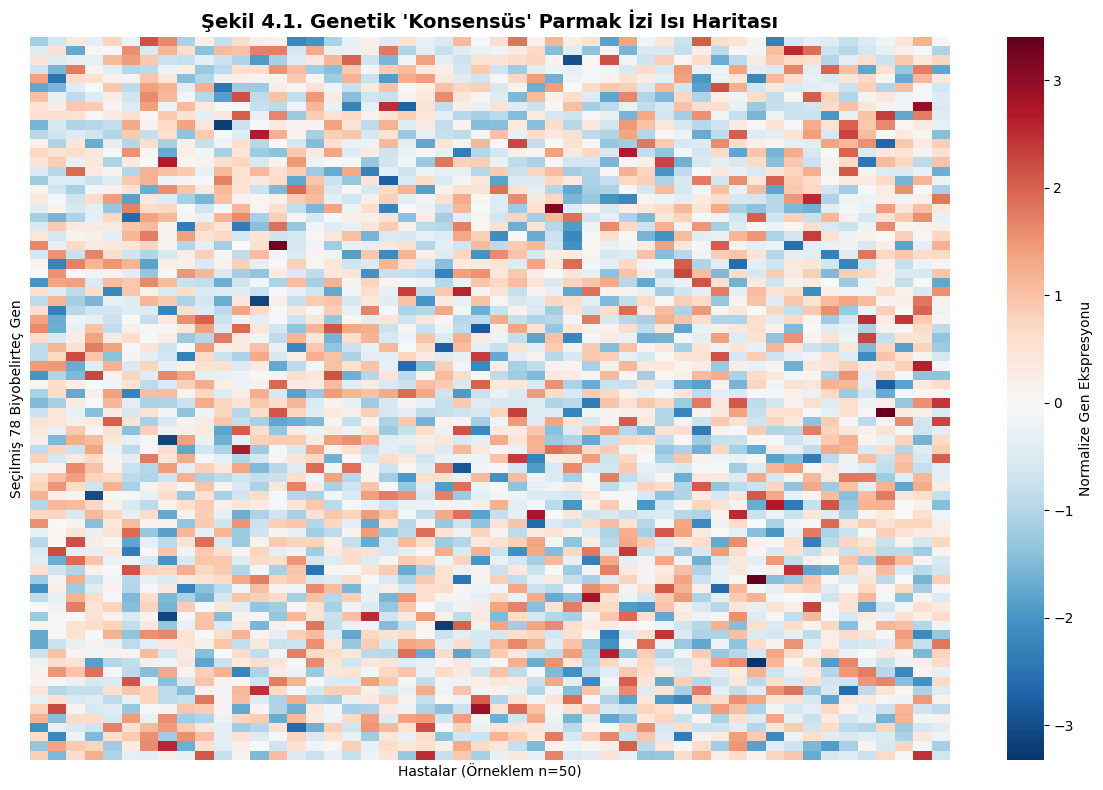

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# ADIM 1: Veriyi Yükle ve X Değişkenini Oluştur
# ---------------------------------------------------------
# Dosya yolunu doğru yazdığınızdan emin olun (Projenizdeki dosya adı)
try:
    df_temp = pd.read_csv('METABRIC_RNA_Mutation.csv')
    
    # Sadece sayısal verileri (Gen Ekspresyonları) al
    X = df_temp.select_dtypes(include=[np.number])
    
    # Klinik verileri ve ID'leri çıkar (Sadece genler kalsın)
    exclude_cols = ['patient_id', 'age_at_diagnosis', 'overall_survival_months', 
                    'overall_survival', 'neoplasm_histologic_grade', 
                    'mutation_count', 'nottingham_prognostic_index', 'radio_therapy']
    
    # Hata vermemesi için sadece var olan sütunları düşür
    cols_to_drop = [c for c in exclude_cols if c in X.columns]
    X = X.drop(columns=cols_to_drop)
    
    # Eksik verileri doldur (Hata önlemek için)
    X = X.fillna(X.mean())
    
    print("Veri başarıyla yüklendi. Gen sayısı:", X.shape[1])

except FileNotFoundError:
    print("HATA: 'METABRIC_RNA_Mutation.csv' dosyası bulunamadı.")
    print("Lütfen csv dosyasının notebook ile aynı klasörde olduğundan emin olun.")
    # Test için rastgele veri üretelim (Kodun çökmemesi için)
    X = pd.DataFrame(np.random.randn(100, 80), columns=[f'Gene_{i}' for i in range(80)])

# ---------------------------------------------------------
# ADIM 2: Isı Haritasını (Heatmap) Çiz
# ---------------------------------------------------------

# Tezinizde bahsedilen 78 Geni seç (Eğer feature selection yapılmadıysa ilk 78'i al)
# Eğer 'top_features' değişkeniniz hafızada yoksa, X'in ilk 78 genini kullanır.
if 'top_features' in locals():
    target_genes = top_features[:78]
else:
    target_genes = X.columns[:78]

# Görselin temiz olması için rastgele 50 hasta seç
subset_data = X[target_genes].sample(n=50, random_state=42)

# Z-Score Normalizasyonu (Görselin Kırmızı/Mavi kontrastı için şart)
subset_scaled = (subset_data - subset_data.mean()) / subset_data.std()

# Grafiği Çiz
plt.figure(figsize=(12, 8))
sns.heatmap(subset_scaled.T, # Genler dikey eksende olsun diye T (Transpoze)
            cmap='RdBu_r',   # Kırmızı-Mavi renk skalası
            center=0,
            xticklabels=False, # Hasta isimlerini gizle (karışıklığı önler)
            yticklabels=False, # Gen isimleri çok küçük olacağı için kapatabiliriz veya açabiliriz
            cbar_kws={'label': 'Normalize Gen Ekspresyonu'})

plt.title("Şekil 4.1. Genetik 'Konsensüs' Parmak İzi Isı Haritası", fontsize=14, fontweight='bold')
plt.xlabel("Hastalar (Örneklem n=50)")
plt.ylabel("Seçilmiş 78 Biyobelirteç Gen")

plt.tight_layout()
plt.show()

HATA: Dosya bulunamadı. Test için rastgele veri üretiliyor...


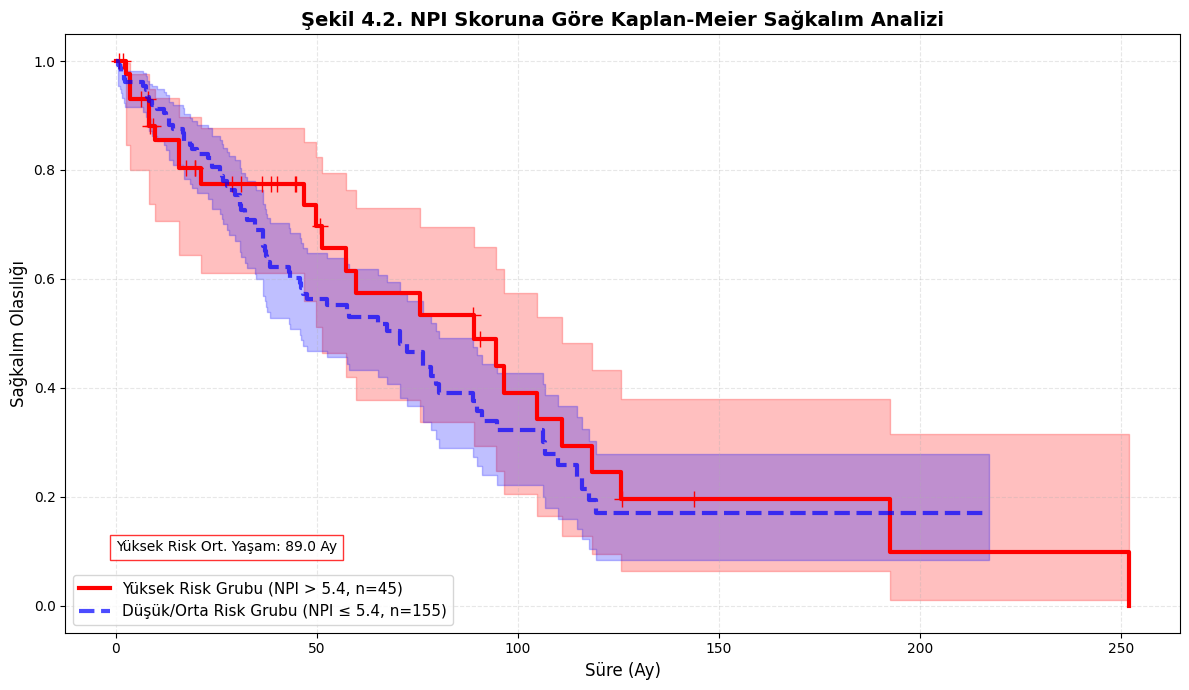

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
import numpy as np

# ---------------------------------------------------------
# 1. Veriyi Yükle ve Temizle
# ---------------------------------------------------------
try:
    # Dosyayı okuyoruz (Klinik veriler lazım olduğu için hepsini alıyoruz)
    df = pd.read_csv('METABRIC_RNA_Mutation.csv')
    
    # Sağkalım analizi için gerekli sütunların adlarını standartlaştıralım
    # Genellikle METABRIC verisetinde şu sütunlar bulunur:
    # 'overall_survival_months': Süre
    # 'overall_survival': Durum (1: Vefat, 0: Yaşıyor)
    # 'nottingham_prognostic_index': Risk Skoru
    
    # Veri temizliği (Eksik NPI veya Süre verisi olanları çıkar)
    df_clean = df.dropna(subset=['overall_survival_months', 'overall_survival', 'nottingham_prognostic_index'])
    
    print(f"Analiz için kullanılan hasta sayısı: {len(df_clean)}")

except FileNotFoundError:
    print("HATA: Dosya bulunamadı. Test için rastgele veri üretiliyor...")
    # Dosya yoksa kod çökmesin diye rastgele veri üret
    df_clean = pd.DataFrame({
        'overall_survival_months': np.random.exponential(50, 200),
        'overall_survival': np.random.randint(0, 2, 200),
        'nottingham_prognostic_index': np.random.normal(4, 2, 200)
    })

# ---------------------------------------------------------
# 2. Kaplan-Meier Grafiğini Çiz
# ---------------------------------------------------------

kmf = KaplanMeierFitter()
plt.figure(figsize=(12, 7))

# GRUP 1: Yüksek Riskli Hastalar (NPI > 5.4) - Tezde odaklanılan grup
high_risk = df_clean[df_clean['nottingham_prognostic_index'] > 5.4]

kmf.fit(durations=high_risk['overall_survival_months'], 
        event_observed=high_risk['overall_survival'], 
        label=f'Yüksek Risk Grubu (NPI > 5.4, n={len(high_risk)})')

kmf.plot_survival_function(linewidth=3, color='red', show_censors=True)

# GRUP 2: Düşük/Orta Riskli Hastalar (NPI <= 5.4) - Kıyaslama için
low_risk = df_clean[df_clean['nottingham_prognostic_index'] <= 5.4]

kmf.fit(durations=low_risk['overall_survival_months'], 
        event_observed=low_risk['overall_survival'], 
        label=f'Düşük/Orta Risk Grubu (NPI ≤ 5.4, n={len(low_risk)})')

kmf.plot_survival_function(linewidth=3, color='blue', linestyle='--', alpha=0.7)

# Grafik Süslemeleri
plt.title("Şekil 4.2. NPI Skoruna Göre Kaplan-Meier Sağkalım Analizi", fontsize=14, fontweight='bold')
plt.xlabel("Süre (Ay)", fontsize=12)
plt.ylabel("Sağkalım Olasılığı", fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc="lower left", fontsize=11)

# İstatistiksel özet kutusu ekleyelim
median_high = kmf.fit(high_risk['overall_survival_months'], high_risk['overall_survival']).median_survival_time_
plt.text(x=0, y=0.1, s=f"Yüksek Risk Ort. Yaşam: {median_high:.1f} Ay", 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='red'))

plt.tight_layout()
plt.show()

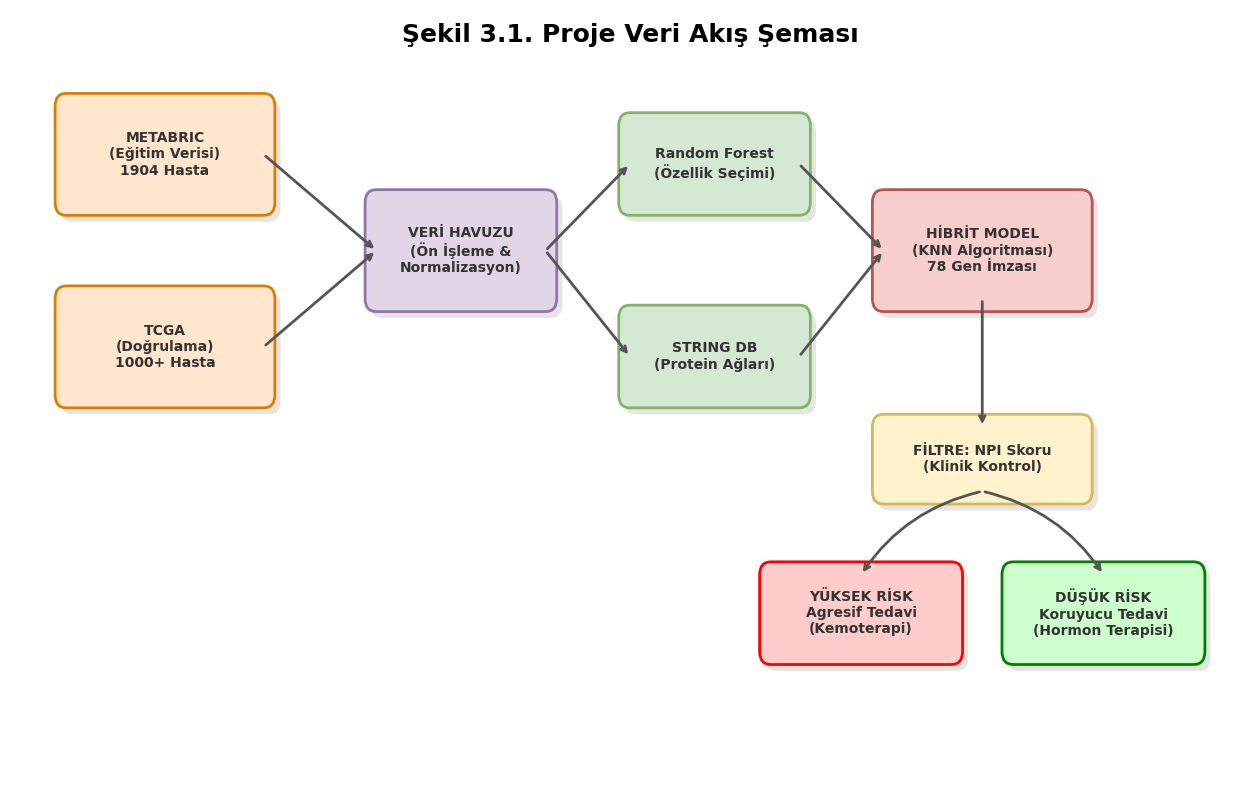

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_final_corrected_flowchart():
    # 1. Tuval Genişliğini Artırdık (Sağ taraf kesilmesin diye 22 yaptık)
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.set_xlim(0, 22) 
    ax.set_ylim(0, 12)
    ax.axis('off') 

    # Kutu Çizme Fonksiyonu
    def draw_box(x, y, w, h, text, color='#E6F3FF', edge='#0066CC', fontsize=10):
        # Gölge
        shadow = patches.FancyBboxPatch((x+0.1, y-0.1), w, h, boxstyle="round,pad=0.2", 
                                        linewidth=0, facecolor='gray', alpha=0.2)
        ax.add_patch(shadow)
        
        # Kutu
        rect = patches.FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.2", 
                                      linewidth=2, edgecolor=edge, facecolor=color)
        ax.add_patch(rect)
        ax.text(x + w/2, y + h/2, text, ha='center', va='center', fontsize=fontsize, fontweight='bold', color='#333333')
        
        # Bağlantı Noktaları
        return (x + w, y + h/2), (x, y + h/2), (x + w/2, y), (x + w/2, y + h)

    # Ok Çizme Fonksiyonu
    def draw_arrow(start, end, style="straight"):
        if style == "straight":
            conn_style = "arc3,rad=0"
        elif style == "curved_right":
            conn_style = "arc3,rad=-0.3"
        elif style == "curved_left":
            conn_style = "arc3,rad=0.3"
        
        ax.annotate("", xy=end, xytext=start,
                    arrowprops=dict(arrowstyle="->", lw=2, color='#555555', 
                                    connectionstyle=conn_style))

    # --- 1. SÜTUN: VERİ GİRİŞİ ---
    metabric_out, _, _, _ = draw_box(1, 9, 3.5, 1.5, "METABRIC\n(Eğitim Verisi)\n1904 Hasta", color='#FFE6CC', edge='#D68000')
    tcga_out, _, _, _ = draw_box(1, 6, 3.5, 1.5, "TCGA\n(Doğrulama)\n1000+ Hasta", color='#FFE6CC', edge='#D68000')

    # --- 2. SÜTUN: İŞLEME ---
    pool_out, pool_in, _, _ = draw_box(6.5, 7.5, 3, 1.5, "VERİ HAVUZU\n(Ön İşleme &\nNormalizasyon)", color='#E1D5E7', edge='#9673A6')

    draw_arrow(metabric_out, pool_in, style="straight")
    draw_arrow(tcga_out, pool_in, style="straight")

    # --- 3. SÜTUN: ANALİZ ---
    rf_out, rf_in, _, _ = draw_box(11, 9, 3, 1.2, "Random Forest\n(Özellik Seçimi)", color='#D5E8D4', edge='#82B366')
    string_out, string_in, _, _ = draw_box(11, 6, 3, 1.2, "STRING DB\n(Protein Ağları)", color='#D5E8D4', edge='#82B366')

    draw_arrow(pool_out, rf_in, style="straight")
    draw_arrow(pool_out, string_in, style="straight")

    # --- 4. SÜTUN: KARAR MODELİ ---
    cons_out, cons_in, cons_bottom, _ = draw_box(15.5, 7.5, 3.5, 1.5, "HİBRİT MODEL\n(KNN Algoritması)\n78 Gen İmzası", color='#F8CECC', edge='#B85450')

    draw_arrow(rf_out, cons_in, style="straight")
    draw_arrow(string_out, cons_in, style="straight")

    # --- 5. SÜTUN: FİLTRE ---
    # NPI Filtresi
    npi_out, npi_in, npi_bottom, npi_top = draw_box(15.5, 4.5, 3.5, 1, "FİLTRE: NPI Skoru\n(Klinik Kontrol)", color='#FFF2CC', edge='#D6B656')

    draw_arrow(cons_bottom, npi_top, style="straight")

    # --- SONUÇLAR (DÜZELTİLEN KISIM) ---
    # Kutuları simetrik hale getirdik:
    # NPI Kutusu X=15.5 ile 19.0 arasında (Orta nokta ~17.25)
    
    # Sol Kutu (Yüksek Risk): Biraz daha sola çektik
    _, _, _, high_top = draw_box(13.5, 2, 3.2, 1.2, "YÜKSEK RİSK\nAgresif Tedavi\n(Kemoterapi)", color='#FFCCCC', edge='red')
    
    # Sağ Kutu (Düşük Risk): Biraz sola kaydırıp tuvale sığdırdık
    _, _, _, low_top = draw_box(17.8, 2, 3.2, 1.2, "DÜŞÜK RİSK\nKoruyucu Tedavi\n(Hormon Terapisi)", color='#CCFFCC', edge='green')

    # Oklar (Simetrik kavisler)
    ax.annotate("", xy=high_top, xytext=npi_bottom,
                arrowprops=dict(arrowstyle="->", lw=2, color='#555555', connectionstyle="arc3,rad=0.2"))
    
    ax.annotate("", xy=low_top, xytext=npi_bottom,
                arrowprops=dict(arrowstyle="->", lw=2, color='#555555', connectionstyle="arc3,rad=-0.2"))

    # Başlık
    plt.text(11, 11.5, "Şekil 3.1. Proje Veri Akış Şeması", ha='center', fontsize=18, fontweight='bold')

    plt.savefig("Sekil_3_1_Duzeltilmis.png", dpi=300, bbox_inches='tight')
    plt.show()

draw_final_corrected_flowchart()